## Main idea: 

Applying Model based approach for creation collaborative filtering recommendation system to use the similarity between items using the ratings by users.

### Data cleaning and preproccesing

In [38]:
import pandas as pd

In [40]:
books_df = pd.read_csv('data/BX-CSV-Dump/BX-Books.csv',  encoding='cp1251', sep=';',error_bad_lines=False)

b'Skipping line 6452: expected 8 fields, saw 9\nSkipping line 43667: expected 8 fields, saw 10\nSkipping line 51751: expected 8 fields, saw 9\n'
b'Skipping line 92038: expected 8 fields, saw 9\nSkipping line 104319: expected 8 fields, saw 9\nSkipping line 121768: expected 8 fields, saw 9\n'
b'Skipping line 144058: expected 8 fields, saw 9\nSkipping line 150789: expected 8 fields, saw 9\nSkipping line 157128: expected 8 fields, saw 9\nSkipping line 180189: expected 8 fields, saw 9\nSkipping line 185738: expected 8 fields, saw 9\n'
b'Skipping line 209388: expected 8 fields, saw 9\nSkipping line 220626: expected 8 fields, saw 9\nSkipping line 227933: expected 8 fields, saw 11\nSkipping line 228957: expected 8 fields, saw 10\nSkipping line 245933: expected 8 fields, saw 9\nSkipping line 251296: expected 8 fields, saw 9\nSkipping line 259941: expected 8 fields, saw 9\nSkipping line 261529: expected 8 fields, saw 9\n'
/Users/elv1ento/PycharmProjects/DSrecommender/venv/lib/python3.7/site-pack

In [41]:
books_df.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0195153448.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0195153448.01.LZZZZZZZ.jpg
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0002005018.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0002005018.01.LZZZZZZZ.jpg
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0060973129.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0060973129.01.LZZZZZZZ.jpg
3,0374157065,Flu: The Story of the Great Influenza Pandemic of 1918 and the Search for the Virus That Caused It,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0374157065.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0374157065.01.LZZZZZZZ.jpg
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0393045218.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0393045218.01.LZZZZZZZ.jpg


In [42]:
books_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271359 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [43]:
books_df.describe()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
count,271360,271360,271359,271360,271358,271360,271360,271357
unique,271360,242135,102023,202,16807,271044,271044,271041
top,096574373X,Selected Poems,Agatha Christie,2002,Harlequin,http://images.amazon.com/images/P/067165344X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/067082416X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/006092909X.01.LZZZZZZZ.jpg
freq,1,27,632,13903,7535,2,2,2


First of all, we see that the field "ISBN" contains only unique values and not empty values, therefore we can use it for the index.

In [46]:
# explore the values form
books_df.ISBN.apply(lambda x: len(x)).value_counts()

10    271356
13         3
11         1
Name: ISBN, dtype: int64

In [47]:
# using regular expressions to get the basic options for the field
books_df[~books_df.ISBN.str.match(r'(\d{10}|\d{9}X|B\w{9})')]['ISBN']

5726      096788330x
6635      002542730x
9907      039330678x
11925     014062080x
14621     042519065x
             ...    
266921    044118376x
267020    088404632x
269552    037376099x
270227    055337365x
270483    039304632x
Name: ISBN, Length: 411, dtype: object

In [48]:
books_df['ISBN'] = books_df.ISBN.apply(lambda x: x.upper())

In [49]:
books_df[~books_df.ISBN.str.match(r'(\d{10}|\d{9}X|B\w{9})')]['ISBN']

Series([], Name: ISBN, dtype: object)

In [61]:
rating_df = pd.read_csv('data/BX-CSV-Dump/BX-Book-Ratings.csv', encoding='cp1251', sep=';')

In [62]:
rating_df.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [63]:
rating_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [64]:
rating_df['ISBN'] = rating_df.ISBN.apply(lambda x: x.upper())

In [65]:
rating_df.ISBN.apply(lambda x: len(x)).value_counts()

10    1139363
9        5140
11       2150
13       1740
12        700
8         677
14         10
Name: ISBN, dtype: int64

There are many incorrect values of the ISBN field

In [66]:
# remove special characters from string
rating_df.ISBN.replace('[^A-Za-z0-9]+', '', regex=True, inplace=True)

In [67]:
rating_df.ISBN.apply(lambda x: len(x)).value_counts()

10    1140069
9        5175
11       1768
13       1336
12        694
8         683
7          50
6           4
4           1
Name: ISBN, dtype: int64

In [68]:
# Extracting only correct values
rating_df['ISBN'] = rating_df.ISBN.str.extract(r'(\d{10}|\d{9}X|B\w{9})')
rating_df.dropna(subset=['ISBN'], inplace=True)

In [69]:
# leave only the present values in the main index
rating_df = rating_df[rating_df.ISBN.isin(books_df.ISBN)]

In [73]:
rating_df

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6
...,...,...,...
1149774,276704,0876044011,0
1149775,276704,1563526298,9
1149776,276706,0679447156,0
1149777,276709,0515107662,10


## Testing different approaches for building a recommender system

The easiest way to get similar items is creating a pivot table and then calculate similarity using cosine_similarity.

Since our data contains more than 1M rows, we cannot use simpe Memory-based approaches to get a Matrix Factorization (MF). 

Therefore, I decided to test more powerful tools adapted to big data.

### Using fastai models for collaborative filtering

Fastai is a deep learning which provides practitioners with high-level components that can quickly and easily provide state-of-the-art results. Fastai library is written in Python, it’s open-source and built on top of PyTorch, one of the leading modern and flexible deep learning frameworks.

In [1]:
from fastai.tabular.all import *
from fastai.collab import *

In [8]:
dls = CollabDataLoaders.from_df(raiting_df, item_name='ISBN', bs=64)

In [9]:
dls.show_batch()

,User-ID,ISBN,Book-Rating
0,156150,0515090654,5
1,194669,0425176045,0
2,223191,0385730586,0
3,146803,0441535062,0
4,126374,0312181213,7
5,61979,0140367160,8
6,195904,1400032717,10
7,231237,0380725231,9
8,120610,0349113165,0
9,28204,0671028383,0


In [10]:
learn = collab_learner(dls, n_factors=50, y_range=(0, 5.5))

In [11]:
learn.fit_one_cycle(5, 5e-3, wd=0.1)

epoch,train_loss,valid_loss,time
0,13.506006,13.130350,29:30
1,13.105197,13.119840,37:12
2,13.283127,13.042991,36:55
3,13.039341,12.966900,36:32
4,12.327477,12.978076,36:03


/Users/elv1ento/PycharmProjects/DSrecommender/venv/lib/python3.7/site-packages/fastai/callback/schedule.py:270: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  ax.plot(val, idx, 'ro', label=nm, c=color)


SuggestedLRs(valley=tensor(0.0398))

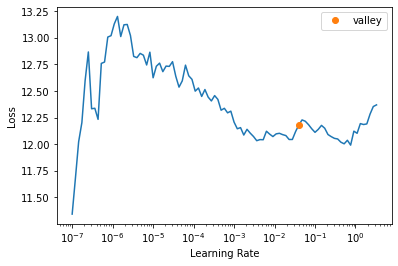

In [12]:
learn.lr_find()

In [13]:
learn.save('collabor2')

Path('models/collabor2.pth')

In [14]:
learn.export('models/collabor2.pkl')

### After training the model, we can get vectors for testing the similarity function

In [99]:
item_embeddings = learn.model.weight(rating_df.ISBN, is_item = True)
item_embeddings = np.array(item_embeddings)
item_embeddings.shape

(1031775, 50)

In [79]:
from sklearn.metrics.pairwise import linear_kernel
from sklearn.metrics.pairwise import euclidean_distances

In [92]:
cosine_similarities = linear_kernel(item_embeddings[0:1], item_embeddings).flatten()

In [100]:
related_docs_indices = cosine_similarities.argsort()[:-10:-1]

In [101]:
books_df.set_index('ISBN').loc[rating_df.loc[related_docs_indices].ISBN].iloc[:, :-3]

,Book-Title,Book-Author,Year-Of-Publication,Publisher
ISBN,,,,
0684837986,Timepiece (Christmas Box Trilogy),Richard Paul Evans,1996,Simon &amp; Schuster
0380818523,Something About Cecily (Avon Romance),Karen Kendall,2001,Avon
0393312836,A Clockwork Orange (Norton Paperback Fiction),Anthony Burgess,1986,W. W. Norton &amp; Company
0449206475,The Witches of Eastwick,John Updike,1995,Fawcett Books
0374223270,The Notebooks of Don Rigoberto,Mario Vargas Llosa,1998,Farrar Straus Giroux
0671003593,An Angel for Emily,Jude Deveraux,1998,Pocket
0553237772,Johnny Got His Gun,Dalton Trumbo,1982,Bantam Books
0373871805,Silver Lining (Love Inspired),Kate Welsh,2002,Steeple Hill
0439099048,Katarina: A Novel,Kathryn Winter,1999,Scholastic


One of the disadvantages of collab_learner is that it does not solve the cold start problem. It can only predict ratings for existing users.

### Using Turi Create models for collaborative filtering

Turi Create simplifies the development of custom machine learning models.

Turi Create based on SFrame - is a scalable, tabular, column-mutable dataframe object. The data in SFrame is stored column-wise, and is stored on persistent storage (e.g. disk) to avoid being constrained by memory size. Each column in an SFrame is a size-immutable SArray, but SFrames are mutable in that columns can be added and subtracted with ease. An SFrame essentially acts as an ordered dict of SArrays.

In [102]:
import turicreate as tc

In [103]:
actions = tc.SFrame.read_csv('data/book_ratings_cleaned.csv')

Finished parsing file /Users/elv1ento/PycharmProjects/DSrecommender/app/data/book_ratings_cleaned.csv

Parsing completed. Parsed 100 lines in 0.274465 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[int,str,int]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file /Users/elv1ento/PycharmProjects/DSrecommender/app/data/book_ratings_cleaned.csv

Parsing completed. Parsed 1143235 lines in 0.4612 secs.

In [104]:
training_data, validation_data = tc.recommender.util.random_split_by_user(actions, 'user_id', 'ISBN')
model = tc.recommender.create(training_data, 'user_id', 'ISBN')

Warning: Column 'rating' ignored.

To use one of these as a rating column, specify the column name to be used as target rating" and use a method that allows the use of a target.

Preparing data set.

Data has 1141499 observations with 104296 users and 333998 items.

Data prepared in: 0.71496s

Training model from provided data.

Gathering per-item and per-user statistics.

+--------------------------------+------------+

| Elapsed Time (Item Statistics) | % Complete |

+--------------------------------+------------+

| 1.705ms                        | 0.75       |

| 22.404ms                       | 100        |

+--------------------------------+------------+

Setting up lookup tables.

Processing data in one pass using sparse lookup tables.

+-------------------------------------+------------------+-----------------+

| Elapsed Time (Constructing Lookups) | Total % Complete | Items Processed |

+-------------------------------------+------------------+-----------------+

| 704.279ms                           | 0                | 0               |

| 3.71s                               | 15               | 50230           |

| 6.76s                               | 29.25            | 98142           |

| 9.75s                               | 36.25            | 121685          |

| 12.75s                              | 52.5             | 175361          |

| 15.77s                              | 56               | 187376          |

| 18.78s                              | 57.25            | 191300          |

| 21.81s                              | 57.5             | 192433          |

| 24.81s                              | 58.75            | 196312          |

| 27.83s                              | 61               | 204429          |

| 30.95s                              | 67.5             | 226279          |

| 34.20s                              | 74.75            | 250100          |

| 36.86s                              | 75               | 251200          |

| 39.92s                              | 79               | 264591          |

| 42.93s                              | 81               | 271182          |

| 45.88s                              | 93.5             | 312989          |

| 48.93s                              | 98               | 327657          |

| 55.35s                              | 98.25            | 328619          |

| 1m 4s                               | 99.75            | 333870          |

| 1m 19s                              | 100              | 333998          |

+-------------------------------------+------------------+-----------------+

Finalizing lookup tables.

Generating candidate set for working with new users.

Finished training in 80.6674s

### After training the model, we can get similar items

In [109]:
my_list_of_items = ['0000913154', '0001010565', '0001046438', '0001046713', '000104687X']
similar_items = model.get_similar_items(my_list_of_items, k=20)

In [111]:
similar_items.to_dataframe()

,ISBN,similar,score,rank
0,0000913154,000625277X,1.0,1
1,0000913154,0006331947,1.0,2
2,0000913154,0006547192,1.0,3
3,0000913154,0070240205,1.0,4
4,0000913154,0070395209,1.0,5
...,...,...,...,...
95,000104687X,0330500279,1.0,16
96,000104687X,0333391004,1.0,17
97,000104687X,0340549157,1.0,18
98,000104687X,0440108241,1.0,19


#### Solve "cold-start" problem

Incorporating information about a new user.

To improve recommendations for new users, it helps to have side information or new observation data for the user.

Incorporating new side information
To incorporate side information, we must have already created a recommender model that knows how to incorporate side features. This can be done by passing in side information to create(). For example:

In [ ]:

"""
user_info = turicreate.SFrame(
    {
        'user_id': ['Ann', 'Brian'],
        'age_category': ['2', '3']
    })

m_side_info = turicreate.factorization_recommender.create(
    data, target='rating', user_data=user_info)
"""

Now, we can add side information for the new user at recommendation time. The new side information must contain a column with the same name as the column in the training data that's designated as the 'user_id'. 

In [ ]:
# add new user

"""
m.recommend(['Charlie'])
new_user_info = turicreate.SFrame(
    {
        'user_id' : ['Charlie'],
        'age_category' : ['2']
    })

recommendations = m_side_info.recommend(
    ['Charlie'], new_user_data = new_user_info)
"""

### Conclusions:

This notebook covered some powerful tools for creating a collaborative filtering recommendation system in a couple of lines of code. I settled on the implementation of Turi Create for the further construction of a hybrid recommender system, since I find it more suitable for my purpose.

### Ways to improve:

To build a more effective recommendation system using Turi Create, we can use the third table 'BX-Users' to incorporate side features for solving "cold-start" problem.